In [1]:
import numpy as np
import pandas as pd
import random
from sklearn import *
import matplotlib.pyplot as plt


path = 'raw_simple_solubility_database.csv'
raw_df = pd.read_csv(path, sep=",")

raw_df

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,95.000000
1,Benzo[cd]indol-2(1H)-one,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,94.100000
2,4-chlorobenzaldehyde,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,935.000000
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,90.000000
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,9.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145e+00,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287e+00,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456e+00,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002e+00,24.986671


In [2]:
print(raw_df.head(10))
raw_df.tail()
raw_df.describe()
raw_df.columns
raw_df.describe()
raw_df[raw_df.solubility_mg_L>100000]

                                                Name    MolWt  MolLogP  \
0         N,N,N-trimethyloctadecan-1-aminium bromide  392.510  3.95810   
1                           Benzo[cd]indol-2(1H)-one  169.183  2.40550   
2                               4-chlorobenzaldehyde  140.569  2.15250   
3  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...  756.226  8.11610   
4  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...  422.525  2.48540   
5                                       vinyltoluene  118.179  2.63802   
6               3-(3-ethylcyclopentyl)propanoic acid  170.252  2.67750   
7  11,16,17,21-tetrahydroxypregna-1,4-diene-3,20-...  376.449  0.52840   
8                       bis(4-fluorophenyl)methanone  218.202  3.19580   
9  1-[2-(benzoyloxy)propoxy]propan-2-yl benzoate ...  342.391  3.49720   

      MolMR  HeavyAtomCount  NumHAcceptors  NumHDonors  NumHeteroatoms  \
0  102.4454            23.0            0.0         0.0             2.0   
1   51.9012            13.0          

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
42,pentasodium 5-{[4-chloro-6-({3-[2-(sulfonatoox...,1136.328,-14.30130,212.8884,69.0,26.0,3.0,38.0,15.0,340.0,5.0,0.0,1.0,6.0,433.56,507.575472,4.760995e-06,4.411700e+05
48,tetrasodium 7-[(E)-2-[2-(carbamoylamino)-4-{[4...,1026.263,-9.94980,197.2081,63.0,23.0,4.0,35.0,15.0,314.0,5.0,0.0,0.0,5.0,414.74,451.055254,4.961244e-06,3.847000e+05
88,hydrogen [4-[[4-(diethylamino)-o-tolyl][4-[eth...,775.969,4.72561,210.4314,54.0,9.0,0.0,12.0,16.0,278.0,5.0,0.0,0.0,5.0,124.12,342.989258,6.497975e-06,1.848700e+05
95,1-[(1-propoxypropan-2-yl)oxy]propan-2-ol,176.256,1.19890,48.2048,12.0,3.0,1.0,3.0,7.0,74.0,0.0,0.0,0.0,0.0,38.69,74.680112,3.153178e+00,1.500000e+05
206,ethanol,46.069,-0.00140,12.7598,3.0,1.0,1.0,1.0,0.0,20.0,0.0,0.0,0.0,0.0,20.23,19.898427,1.632993e+00,7.890000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033,compound51,203.669,1.06680,NaN,13.0,3.0,3.0,4.0,3.0,74.0,1.0,0.0,0.0,1.0,52.49,83.817652,1.440000e-06,1.000000e+05
10034,compound52,219.237,NaN,52.1361,15.0,4.0,4.0,6.0,6.0,88.0,0.0,0.0,0.0,0.0,106.86,87.914396,4.050540e+00,1.000032e+06
10044,compound62,238.349,NaN,48.4942,14.0,3.0,0.0,5.0,2.0,72.0,1.0,0.0,0.0,1.0,57.20,127.077430,1.690000e-06,4.990000e+05
10045,compound63,160.104,-3.24030,32.4373,11.0,3.0,1.0,4.0,1.0,52.0,1.0,0.0,0.0,1.0,NaN,85.959734,9.999998e-07,1.250000e+05


In [3]:
for i, s in raw_df.iterrows():
    print(s["MolWt"])

392.51000000000016
169.18299999999996
140.569
756.2260000000003
422.52500000000015
118.179
170.25199999999995
376.4490000000001
218.202
342.39099999999996
149.19299999999996
192.25800000000004
733.0020000000003
206.285
260.255
154.253
214.648
660.2820000000003
180.556
228.332
218.362
136.238
202.138
150.47199999999995
181.235
604.1740000000002
195.476
136.238
386.62100000000015
258.402
33.03
192.21400000000003
499.71700000000016
184.279
570.3679999999998
366.50500000000017
220.356
158.24399999999994
95.94
198.306
148.249
128.17100000000002
1136.3280000000002
344.50199999999984
658.8910000000002
426.3480000000001
252.364
152.237
1026.263
868.35
189.324
256.342
298.427
502.30700000000013
215.168
148.16099999999997
192.258
178.275
196.29
166.264
140.22599999999997
268.312
488.67100000000033
284.399
891.500999999999
186.295
116.161
121.18299999999998
228.332
360.45000000000016
622.5880000000002
389.835
206.24099999999999
338.44400000000013
34.033
214.264
379.37500000000017
591.621000000000

148.67700000000005
255.27700000000002
202.38199999999995
282.37999999999994
304.4740000000001
364.5740000000001
234.38299999999995
743.7269999999997
231.031
613.9880000000003
200.237
197.322
162.188
214.35899999999995
178.23099999999997
159.188
397.42100000000016
328.4050000000001
116.15999999999998
194.186
104.15199999999996
170.25199999999995
216.882
226.304
206.329
156.269
196.29
180.291
128.049
166.176
148.20499999999996
271.7
176.215
492.70000000000056
483.6060000000003
158.285
219.947
189.192
362.4660000000002
343.55199999999996
196.334
227.392
156.26899999999995
241.463
78.542
576.1200000000001
157.55599999999995
170.21099999999996
905.8210000000003
112.987
121.18299999999996
158.285
626.0480000000001
161.031
308.3590000000001
308.33299999999997
337.8540000000001
266.318
150.17699999999996
56.108000000000004
172.17999999999995
109.128
488.6140000000004
366.63400000000007
161.03099999999995
182.307
152.237
181.14700000000002
203.21900000000002
214.22
430.53000000000014
400.556000

302.329
296.156
1231.9699999999993
192.266
296.32000000000005
508.46800000000025
88.53699999999998
196.249
88.00300000000001
212.292
268.125
691.8590000000003
110.134
1069.6499999999994
257.33299999999997
484.93100000000015
503.5070000000002
626.4660000000002
233.739
109.128
160.26000000000005
973.0040000000004
197.217
136.238
340.4190000000001
269.51699999999994
192.30200000000002
213.409
954.2180000000003
239.101
1053.5539999999987
1618.7970000000007
421.0260000000002
206.32899999999992
206.32899999999992
198.306
276.29200000000003
321.93300000000005
212.248
218.27700000000002
141.17
90.12200000000001
376.27500000000015
147.993
92.119
289.4190000000001
621.044
318.84500000000014
70.092
267.32800000000003
632.7590000000001
121.95199999999998
582.7790000000002
342.5240000000001
133.191
153.14100000000005
631.5710000000003
323.4480000000001
607.9610000000004
197.11
262.29200000000003
138.25399999999996
684.9490000000005
374.58700000000016
290.362
404.5910000000004
346.52500000000015
234

395.58100000000013
218.205
72.107
264.318
192.123
84.08200000000002
261.23400000000004
214.105
666.3950000000002
1015.0159999999997
150.13
205.254
150.08599999999996
685.4150000000006
188.176
188.179
296.57599999999996
202.25
177.32600000000005
56.06500000000001
89.09399999999998
226.107
117.19200000000001
278.261
190.109
202.21400000000003
146.18599999999995
113.204
99.089
148.11499999999995
629.3730000000003
492.5860000000003
113.116
650.5770000000002
236.08700000000002
108.14399999999999
132.203
86.04599999999998
173.25799999999995
248.26
108.1
238.43599999999998
144.196
217.18400000000003
239.38299999999992
118.176
157.21299999999997
194.04999999999995
182.156
129.115
72.107
88.175
136.14999999999998
64.515
148.98000000000005
926.8110000000003
121.18299999999999
127.574
172.12400000000005
542.5890000000003
116.208
155.15699999999995
168.236
125.90200000000002
222.24
126.119
157.60000000000005
154.08499999999995
242.271
123.11099999999998
152.23999999999995
134.606
254.267
171.22099

74.127
74.079
185.36900000000003
1221.1639999999998
327.2940000000001
114.02200000000002
122.145
414.3720000000001
266.03799999999995
173.19299999999996
422.50300000000016
302.515
102.17699999999998
150.17700000000005
96.08599999999998
106.12100000000001
324.838
242.083
144.17700000000005
237.706
182.179
126.09099999999998
138.20999999999998
199.15200000000002
204.31
170.59900000000005
408.4350000000002
277.32
78.11399999999998
394.6920000000002
226.36
128.17099999999996
210.273
198.48
688.8980000000005
158.18200000000004
285.4350000000001
165.236
227.085
140.18200000000002
248.218
96.10399999999998
358.52000000000015
81.065
390.3410000000002
164.248
120.15099999999997
174.23999999999995
208.33
164.248
140.56899999999996
150.22099999999998
217.353
211.129
586.5790000000002
243.28400000000002
354.54400000000015
148.202
25.939
185.31099999999998
264.284
146.189
192.174
330.422
197.194
178.275
144.17299999999997
162.019
141.601
228.248
228.332
1085.0970000000002
164.204
44.01300000000001


622.9340000000002
504.2880000000001
400.05599999999987
462.074
438.052
403.62300000000016
1393.9079999999994
1094.7729999999997
971.2260000000001
390.5640000000003
51.996
348.71700000000016
215.838
604.7050000000003
420.63100000000014
925.8259999999997
484.77000000000015
374.784
91.0
66.985
654.0790000000002
611.0540000000002
556.6680000000001
367.36500000000007
30.974
818.498
278.315
79.865
706.1479999999997
299.03899999999993
447.4520000000004
627.1190000000001
336.4770000000001
395.202
576.5910000000001
412.4080000000001
474.6040000000003
126.243
265.807
264.73900000000003
555.8280000000002
212.421
327.3000000000001
916.6499999999997
545.3340000000002
352.3700000000002
1978.5899999999995
340.3820000000001
436.2980000000002
657.5580000000001
162.5
470.52400000000017
269.943
480.47600000000017
284.336
576.0820000000002
91.939
396.61200000000025
58.933
536.9700000000005
238.415
162.27599999999995
358.40100000000007
440.4590000000002
623.5040000000002
643.4830000000002
350.462
296.539
2

89.13799999999998
259.822
198.218
602.5890000000003
678.5930000000002
167.208
254.27900000000002
697.613
258.345
140.18200000000002
157.21299999999997
76.05499999999998
88.06199999999998
143.142
276.317
196.938
177.98499999999996
133.534
392.58000000000015
413.42600000000033
224.215
257.11400000000003
179.60600000000005
266.253
249.26900000000003
291.3060000000001
160.17199999999997
300.5940000000001
296.56200000000007
203.24099999999999
191.05700000000002
389.914
256.25699999999995
203.672
197.241
182.179
135.21
183.591
146.18599999999995
188.208
186.236
286.28
191.139
138.122
171.22099999999998
134.19899999999998
324.29300000000006
216.222
240.35
251.243
148.205
142.19799999999995
230.30399999999992
172.17999999999995
202.25
310.6910000000001
237.192
199.975
104.061
133.197
128.156
95.10099999999998
103.12100000000001
150.232
256.35400000000004
159.06
144.21399999999997
185.355
206.28199999999995
490.6390000000002
234.231
204.134
183.93400000000003
78.042
119.12
150.08599999999996
22

444.56800000000015
213.195
190.24400000000003
145.202
134.135
353.67900000000014
116.164
166.325
160.16899999999995
96.173
156.313
121.183
123.17899999999996
121.18299999999998
144.17
156.612
166.57099999999997
150.17700000000005
173.21900000000005
176.25899999999993
215.362
343.82900000000006
236.275
311.4070000000001
548.6730000000006
174.196
149.102
172.27199999999996
173.21200000000005
138.122
157.213
157.21599999999995
193.202
193.20200000000003
213.305
250.338
258.405
394.31600000000014
362.40600000000006
388.47100000000006
492.3890000000002
226.36
492.3890000000002
418.39800000000025
388.20700000000005
329.4430000000001
240.215
243.222
122.12699999999997
256.474
144.17399999999995
121.18299999999999
134.17800000000003
124.99799999999999
113.204
178.27499999999995
259.055
173.21200000000005
166.18
169.13599999999997
118.17599999999996
86.134
142.585
177.03
200.21900000000002
229.855
146.14999999999995
155.201
228.247
160.173
271.138
211.269
79.102
149.284
314.29600000000005
132.2

224.149
147.43200000000004
516.6900000000003
442.60000000000014
174.28400000000005
99.133
144.21399999999997
110.971
144.12599999999995
270.28400000000005
241.87
494.0130000000003
141.132
143.22999999999996
381.02
173.171
204.273
168.23600000000005
217.02200000000002
204.31
256.72900000000004
420.32200000000006
245.92
154.10199999999998
304.43900000000014
295.291
720.7210000000003
144.494
218.09
639.4160000000003
193.246
339.3590000000001
256.30499999999995
176.25599999999997
179.15099999999995
181.877
696.8310000000004
220.272
199.213
299.6910000000001
461.02200000000016
242.34599999999998
136.114
118.09199999999998
227.271
260.295
637.4390000000002
101.19299999999998
192.178
193.202
308.1860000000001
373.37100000000015
220.997
355.57500000000016
225.296
218.249
132.12300000000002
89.13800000000002
653.73
298.3040000000001
139.11
127.231
327.572
402.9180000000002
295.25500000000005
73.13900000000002
164.986
271.34099999999995
236.271
245.207
175.19500000000005
132.159
174.239999999999

171.28400000000005
418.5740000000001
314.216
384.58900000000006
376.496
289.3350000000001
288.347
234.343
248.37000000000003
262.397
276.42400000000004
290.451
239.702
401.83200000000016
189.174
295.77
338.7940000000001
332.4000000000001
118.176
422.87400000000014
431.31900000000013
410.4080000000001
381.11200000000014
399.5380000000001
394.299
402.751
291.782
291.782
326.2270000000001
367.86
218.168
332.139
209.209
324.207
222.41899999999995
116.16
233.09400000000002
315.399
265.422
468.34100000000007
411.7450000000002
283.7989999999998
506.21400000000017
267.325
433.81000000000006
309.837
423.86800000000017
275.80100000000004
383.23100000000017
274.404
309.671
264.3
264.3
150.09
254.337
166.14
295.77
130.18699999999998
162.15200000000004
159.14399999999995
244.334
167.16400000000004
224.148
200.19400000000002
212.205
190.239
221.643
184.239
204.233
186.25099999999998
180.203
233.22299999999998
286.2870000000001
210.233
130.14299999999997
214.30499999999995
196.183
222.204
264.282
284

290.344
224.282
196.228
252.336
240.28400000000002
194.142
208.216
238.151
204.298
216.08900000000003
143.211
103.241
117.26799999999999
144.33399999999997
186.14700000000002
208.153
257.164
344.05000000000007
382.48200000000014
410.5360000000002
380.55400000000014
336.74000000000007
295.131
318.6780000000001
30.026
50.06
100.14200000000001
126.13299999999998
148.16099999999997
86.08999999999996
100.117
178.27800000000005
162.141
332.749
206.097
115.15700000000001
215.328
552.6580000000001
247.251
44.00899999999999
330.4530000000001
422.92800000000017
350.48000000000013
406.92900000000014
108.118
322.3250000000001
139.179
194.277
314.802
330.801
196.46400000000003
166.176
242.23
124.13899999999997
104.458
193.128
197.38099999999997
390.3410000000002
135.166
210.285
99.089
202.282
152.22199999999995
321.9740000000001
459.75400000000025
321.9740000000001
253.084
390.86400000000015
356.41900000000015
305.975
321.9740000000001
326.437
213.236
242.23
214.246
218.25599999999997
113.12
281.35

279.336
293.31900000000013
250.25799999999998
371.157
250.25799999999998
273.54600000000005
267.245
270.35400000000004
273.54600000000005
307.30200000000013
223.253
367.24800000000016
234.18599999999998
321.3730000000001
254.337
294.263
284.38100000000014
319.88
307.34600000000006
321.3730000000001
267.24499999999995
261.708
246.266
264.212
352.88699999999994
250.185
298.40800000000013
279.30000000000007
250.185
283.244
312.43500000000006
293.283
293.798
379.50100000000015
323.3010000000001
307.991
297.656
280.21100000000007
326.4620000000001
326.4620000000001
340.4890000000001
280.24
337.3280000000001
287.315
324.682
327.38000000000005
291.259
300.314
281.31100000000004
309.282
247.64500000000004
267.31
342.4360000000001
300.7410000000001
321.337
315.369
365.96400000000006
313.35299999999995
288.255
304.302
270.248
336.348
318.329
324.36000000000007
343.4230000000001
345.39500000000015
364.40200000000016
376.881
345.22600000000017
376.881
376.881
364.40200000000016
376.881
259.29
376.

755.9209999999997
742.9219999999997
766.9439999999997
780.9709999999997
754.8929999999997
738.8899999999999
170.33999999999997
198.39399999999995
106.95
72.10700000000001
220.976
158.072
298.3040000000001
214.294
305.3400000000001
329.3180000000001
341.19000000000005
391.29400000000015
381.3700000000002
146.111
45.085
207.107
163.387
150.17700000000005
253.42999999999992
297.439
143.142
157.16899999999995
227.304
107.15599999999998
107.156
260.253
237.258
238.24599999999998
268.272
314.345
378.81600000000014
369.40200000000016
373.8000000000001
160.172
126.11099999999998
176.12400000000005
303.358
290.447
288.4310000000001
220.228
90.07799999999999
244.31600000000003
124.161
150.155
149.19299999999996
62.498999999999995
46.044
154.46500000000003
188.017
192.167
137.01999999999998
72.15100000000002
89.094
292.36
172.26799999999997
270.372
266.34
183.11900000000003
247.301
275.348
180.15599999999998
247.55
254.15
285.343
236.334
128.986
195.47600000000003
176.12400000000005
198.265
138.1

366.79699999999997
280.30500000000006
192.17
251.326
229.195
307.434
321.461
313.397
380.82400000000007
380.82400000000007
227.227
364.4230000000002
300.769
249.314
230.27
231.226
241.25000000000009
245.253
255.317
255.31700000000004
394.85100000000017
306.35500000000013
368.366
273.288
296.153
296.153
287.315
287.315
228.255
231.144
171.23999999999995
183.25099999999995
197.278
211.30499999999995
207.233
221.26
235.287
249.314
263.341
277.368
297.741
352.48100000000005
352.48100000000005
366.50800000000015
382.5070000000002
388.5360000000002
388.53600000000006
366.46400000000006
374.50900000000007
388.5360000000002
366.46400000000006
371.43700000000007
260.34
288.39399999999995
304.39300000000014
357.41000000000014
362.2780000000001
323.399
237.255
234.23
289.093
392.48400000000015
394.258
167.16400000000004
283.3520000000001
210.232
173.21199999999996
240.30599999999998
313.441
375.46800000000013
313.39700000000005
366.24700000000007
269.351
232.301
313.441
301.3859999999999
237.3020

In [4]:
raw_df.isna().sum()

Name                    0
MolWt                   4
MolLogP                12
MolMR                   7
HeavyAtomCount          4
NumHAcceptors           6
NumHDonors              3
NumHeteroatoms          9
NumRotatableBonds       4
NumValenceElectrons     5
NumAromaticRings       11
NumSaturatedRings      10
NumAliphaticRings       3
RingCount               2
TPSA                   10
LabuteASA               5
BalabanJ                2
solubility_mg_L         4
dtype: int64

In [5]:
raw_df[raw_df.isna().any(axis=1)]

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
9982,compound0,221.322,1.1866,55.9083,14.0,3.0,2.0,5.0,NaN,84.0,0.0,1.0,1.0,1.0,66.40,85.831455,2.029093,184.000000
9983,compound1,214.294,0.3715,56.9234,14.0,6.0,1.0,6.0,1.0,78.0,1.0,0.0,NaN,1.0,73.80,86.688142,3.397091,1219.017700
9984,compound2,139.110,1.3004,34.7612,10.0,NaN,1.0,4.0,1.0,52.0,1.0,0.0,0.0,1.0,63.37,56.878613,3.003401,15971.965029
9985,compound3,228.288,2.2292,60.8740,16.0,4.0,0.0,NaN,8.0,92.0,0.0,0.0,0.0,0.0,52.60,96.614146,3.628216,11.090000
9986,compound4,110.971,1.9777,25.7130,5.0,0.0,0.0,2.0,1.0,30.0,0.0,NaN,0.0,0.0,0.00,41.386065,2.847379,2149.856635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002,24.986671


In [6]:
df=raw_df.dropna(axis=0, how='any', inplace=False)

In [7]:
df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9.982000e+03
mean,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,1.003622e+05
std,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,5.837046e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,4.400463e-08
25%,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,1.259900e+01
50%,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,5.332473e+02
75%,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,1.200120e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,3.770000e+07


In [8]:
#Analiza zmiennej wyjściowej
df.solubility_mg_L.describe()

count    9.982000e+03
mean     1.003622e+05
std      5.837046e+05
min      4.400463e-08
25%      1.259900e+01
50%      5.332473e+02
75%      1.200120e+04
max      3.770000e+07
Name: solubility_mg_L, dtype: float64

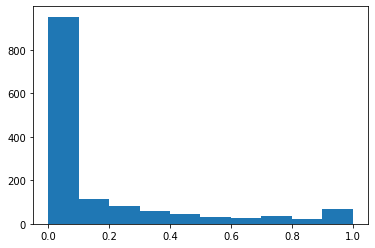

In [9]:
#Analiza zmiennej wyjściowej - przedstawienie histogramu
plt.hist(df.solubility_mg_L[df.solubility_mg_L<1])
plt.savefig("file.pdf")

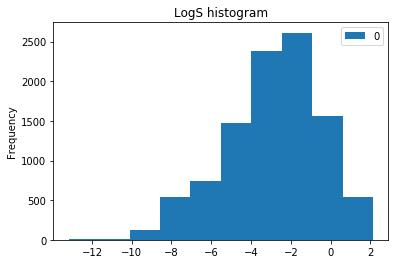

In [10]:
#Przekształcenie zmiennej wyjściowej w celu redukcji odległości między wartością min i max
LogS=np.log10(df.solubility_mg_L/1000/df.MolWt)
LogS=pd.DataFrame(LogS)
LogS.describe()
LogS.plot(kind="hist", title="LogS histogram")

In [11]:
X=df[df.columns[1:17]]
Y=LogS

# Budowa modelu - regresja liniowa

In [17]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
print(reg.coef_, reg.intercept_)
y_pred = reg.predict(X)

[[-4.82495401e-03 -4.55841737e-01  2.26092592e-02 -3.21256971e-02
   1.42091980e-01  1.22898796e-01 -6.44266261e-02 -2.25462254e-02
   2.14258798e-02  1.05986024e+12 -5.82032150e-02  1.05986024e+12
  -1.05986024e+12 -3.61123620e-03 -1.42691933e-02  4.09927527e-02]] [-1.70875646]


In [19]:
y_pred

array([[-3.56116801],
       [-3.39697903],
       [-2.94564555],
       ...,
       [-2.78954998],
       [-3.91502916],
       [-3.79485391]])

In [20]:
results=pd.DataFrame(y_pred, columns=["predicted"])
results["obs"]=Y
for i, value in results.iterrows():
    print(value.obs, value.predicted)

-3.6161271205 -3.561168011476325
-3.2547670983 -3.3969790311927115
-2.1770779444 -2.9456455485260538
-3.9244090954 -7.166777499896852
-4.6620645831 -4.209138735419393
-3.1231503041 -2.873273487003265
-3.286116314 -2.933838834424538
-2.6645485391 -2.215115257605935
-4.3966521847000015 -3.7691937049662156
-4.595502563999999 -3.5714130208631243
-2.2827688499 -2.328990037645486
-2.3946499685 -2.802303183222908
-1.9803097957 -7.016197399157988
-3.4302388798 -3.188799974092791
-3.5440597008 -3.670883909457131
-2.3206011661000003 -2.341764305765823
-2.4660307863 -3.03039238077078
-2.9581950472000003 -5.868736986921482
-3.4115138849 -3.765042282803301
-3.5134687407 -2.8492979330771355
-4.4543816995 -2.5086494496622693
-4.2873429345 -3.0884853510574146
-3.4731390517 1.0356765948317577
-2.3632080977000003 -2.029594471022251
-3.4541026398000003 -1.7759914632605727
-2.9908768679000004 -5.318701953690069
-3.5129421932 -3.9609175453851244
-4.2923134549 -3.655624430999402
-4.8091341894 -2.88254595311

-2.6913820060000004 -2.00387872110635
-3.4657606101 -3.5594337348342333
-0.3990804112 -2.170162275984698
-2.4740066421 -2.491401887994362
1.0233941334 0.6375391633262284
-2.4941685135 -2.081188832939159
-3.539328096 -3.0230175708107865
-4.5787304077 -4.211997572022205
-4.6234419541000005 -3.9850020462380034
-4.5348386091 -2.4560216727193627
-4.0080532109 -5.307384428411414
-4.788985440799999 -4.875569589988758
-4.5442204359 -3.3832147760456897
-4.4708606495 -2.790828073447419
-5.4050532611 -20.42873993111681
-5.0416978328 -10.168459308571006
-4.3112256046 -3.3160521796686426
-4.5540762927 -3.176904429078943
-4.346837785 -3.054086235146715
-4.5097094839 -2.730725442308233
-4.7025138257 -4.269633126625692
-4.6602344394 -2.2752613446406285
-4.5802538276 -3.1087038537012104
-4.6134788776 -4.072304962690993
-2.3999022404 -2.5759951731356625
-1.4057514128 -2.589994413006665
-2.4116682055000003 -2.591291334827642
-3.4515155376 -3.1848633553613324
-3.4892158636 -2.7791727159559976
-3.394062683

-1.6969729899000001 -2.5647090702509576
-2.8164963969 -2.1103465765525136
-3.8986556211 -2.916914024170679
-3.7276952246 -3.7677538264810084
-3.7423730992 -3.0654949641003477
-3.9037320907 -3.1070521498508277
-3.8838494997 -3.0896725453246114
-6.4511045339 -4.653541028672851
-3.5462434596 -1.5982301525751783
-3.7960463334 -3.1171479864953557
-3.7917820609 -3.0893097996630656
-3.86580004 -2.9707408594181963
-2.9287991689 -1.7813391946742796
-2.5105450102 -2.610738599460474
-2.8204043469 -1.3639081053612898
-2.7764329492 -2.8064040439701166
-1.3147228435999998 -2.2823978569562913
-2.6942897822000003 -2.4602630901738634
-2.7506819237 -3.0250051066068244
-2.6677709688 -3.0647580148452738
-4.3707014658 -7.133183192093019
-3.9191737976 -3.7387940078921043
-3.7461507617 -2.562479882093914
-4.5661230993 -5.653229095425232
-3.8026769123 -3.145434292621135
-3.0959725365 -2.623324874393783
-4.0635303796 -2.6706023808966055
-4.0879587895 -5.450603770204727
-0.8283051545000002 -2.3781799343787733
-

-4.8831871131 -3.5360803636983773
-4.448167714599999 -2.212458271855465
-4.8439277143 -3.825595036660334
-4.7823935551 -3.723785839940207
-5.1332331523 -3.708243494235747
-4.9878258088 -3.386310175872375
-5.0237548039 -3.4173384827404334
-4.9755135023 0.0020341008931470395
-5.1553472856 -1.6159789300610548
-4.9372094561 -4.100109856378774
-4.9417913147000005 -3.7159015446691557
-3.4351686053 -2.714730907961327
-5.0452642864 -4.686640694599941
-5.082600348500001 -3.3426322537848745
-5.3942867121 -5.349898791000411
-5.3065828462 -4.942486081153325
-5.022602512200001 -3.671893222287327
-5.0561178371 -3.9102309653162886
-4.953059618999999 -2.8664130578499503
-4.7986506454 -2.9570288421920097
-4.9542967929 -3.708029047167014
-4.688326948 -2.594096511166158
-5.0876626154 -4.534092953384739
-5.1305146868 1.895261044335387
-5.1145685291000005 -2.7299662144916086
-4.959305966700001 -3.042745894620385
-5.0543936585 -3.1044071204718406
-5.463097207000001 -4.9379982492253
-5.440787474 -6.095815847

-5.506567842999999 -6.3179376897950315
-5.393383394500001 -3.5411168278431218
-5.0103439368 -3.0697807258503653
-2.5423613079 -2.522677192949485
-5.1999126975 -2.936371963727501
-5.151636178 -3.0921111774279435
-5.4583984126999985 -4.058899132195929
-5.648400548200001 0.21096639815678753
-4.8349877189 -2.6362055202047427
-5.517335043099999 -6.012071840356226
-5.905407864500001 -11.01648649748805
-5.3715223063 -4.165839357909798
-5.5486422223 -3.087898455437295
-5.4565752567 -3.356736621949383
-5.4227803586 -3.6405939053559986
-5.253149755 -1.266383788881332
-5.335319967699999 -3.5030417694921265
-5.6941064111 -6.148845179163506
-5.444898910599999 -3.369453044920991
-5.5333331166 -3.062083284822603
-5.7380720068 -7.097175607240921
-5.2104276195 -3.815701766042202
-5.5126055421 -4.2807362098591675
-5.5668107327 -4.344582338128053
-5.567720212 -3.135926660427017
-5.6216352692 -2.6681640993408537
-5.4019396274 -3.5845544637892766
-5.5152815814 -3.440278393634624
-5.4738386427 -4.3570170062

-7.5346282403 -3.507567237409136
-6.654998170599999 -3.4094625315347695
-7.985818524400001 -4.203383605059671
-4.7809414151 -4.663874627040479
-6.8769767405 -3.318909012435938
-6.7070311388 -2.054462813756988
-6.7972389302 -2.587440982207733
-6.8235536072 -2.1077771133817085
-7.3120335908 -4.894766353418419
-3.618466492200001 -3.0179122159277583
-4.9756247854 -3.293604945576411
-4.9504317948 -5.807169585402958
-4.7267916006 -2.909328842925081
-5.0575951101 -5.302190992730813
-4.0456632384 -4.436627369061851
-3.8458307588 -3.769406970365595
-4.8694711026 -3.8497884010719736
-5.4154147676 -12.89312125397953
-3.0199412712 -3.0483551749658213
-1.0591609316 -2.6095357565806783
-4.7999839607 -4.2953459210615
-2.5939062498 -3.2687762416562736
-3.2350788163 -3.3717765529804407
-3.6996406686 -2.9420964905487854
-4.9189988507 -4.114539056829841
-5.142667396 -5.063072788317992
-5.0368259397 -4.220208029917266
-5.0625368604 -2.0585505531969868
-5.1935197379 -3.2693429052844323
-5.9787509813 -1.654

-8.2677435641 -5.0766360110775075
-8.1257893916 -7.60536974683649
-8.0974343241 -4.612694439152191
-8.123728845599999 -4.9609665241319325
-8.6167666964 -5.332053435358558
-8.85998044 -4.925223366916427
-9.1518109699 -5.286217571402149
-9.7071062552 -11.855284970609702
-9.6499887292 -4.949127013659323
-3.8353901487 -3.513505412482168
0.5890195686999999 -1.9276507471236026
1.0138642136 -0.6198126647168556
-0.9675670249000001 -4.453892678637255
-1.8872466915 -5.084588728733011
0.749634411 -0.8314296243482131
0.6127511139000001 -2.7579163198175927
-0.9163461364 -3.135432224500674
-1.8973139062 -3.3114728737285524
-1.1429743647 -2.2089324221449815
0.7806710209000001 -0.5633992201151317
0.5538399495999999 -0.40838198899307865
0.9461910523999998 -1.8983388920199729
-0.22502829749999995 -1.5876495055442492
0.5397304724000002 0.29612586977976196
-1.8129006218000001 -3.470179213133632
-0.14737367920000005 -2.3056255542638744
0.3961032361 2.9284584198825296
-0.7639420940999999 -2.046824083761772


-0.7188245606999999 -3.9238517425415655
-0.7147015973999999 -2.2816189209964337
-0.7741720686 -3.885593663241037
0.4865525209000001 0.4853308407291652
-0.8725523684999998 -3.706418277189127
0.005967329899999973 -1.6451584914148754
1.3686434782 -1.2538148321812215
-0.7073891823999997 1.8408379220713043
-3.7081424715 -3.3457915893232086
0.6949528649 -0.8650962858432516
-1.1748734719 -3.0467594879410136
0.21257446860000004 -2.8888446034515156
0.4318666789 -0.07936246350983955
0.7853597575 -1.0199664981676166
1.0058274476 -1.7366998558705389
1.3775443727 -0.9610741655206867
1.0125444228 -0.24406444528229265
-0.1967366109 -2.0439500553579903
-1.2293181874000003 -0.9204470618906585
-1.7271281938 -3.678590521751314
-0.8144249576 -2.219321337437082
-1.5982895297 -2.9648675801909077
-1.743927996 -4.6017824794740285
-1.0383982131 -2.2941977739733823
-1.2899752166 -1.7173087085939216
-1.2416022633 -2.1195949538859766
-1.7991126191 -2.3077708487860598
-1.336078753 -2.3602984408455896
-1.9476532093

-2.4833879664 -3.521887076150748
-1.7718215433999998 -2.6577492623810604
-1.4743213171 -2.019099855933064
-1.6002483409 -2.4610029741065107
-1.4333383705000002 -2.371093884348565
-1.3774493615 -2.142292904573291
-1.5647364969 -2.502848783650276
-1.7182484470999997 -1.9149589827037636
-1.5039654481 -2.159989064206725
-1.8755690909 -1.9261736437603263
0.8380333836 -2.009092937746251
-1.6367385713999998 -1.9366741764375424
0.17790359960000007 -1.1015907137224528
-0.4161044823 0.16464197727355034
-0.5767319197 -1.916584941538637
0.5257355357 -1.9802340893738017
0.34499272170000006 -0.7479710884904238
-0.3893149412 -0.6998077632229387
-0.48433581049999996 -5.579017306461386
-0.7568844320999997 -1.2533893772693327
-0.5071845321000003 -1.945000737186758
-0.5071845321000001 -1.945000737186758
0.1271332296 0.05460993913887213
0.4168921924 -0.9861011578290029
-0.13956089790000004 -4.468846155443023
0.8422541039 -0.7770228363542422
0.1471983168999999 -0.6075462652011581
-0.6677809794000001 -1.863

-0.2838814083 -2.3435122654020333
-1.1028619258 -2.0008503414222107
-0.8986939452 -1.7542248031298908
-0.8644958680000001 -2.2665601124575705
-1.0034177306 -2.2575658841337356
-0.9387416733 -0.9279076678535647
-0.8539252344999999 -2.291120156951344
-1.096509119 -2.280817676307629
-0.7590833569 -1.9912147525915973
-0.10764988559999998 -0.49188791095767814
-0.39542321229999994 3.262356892539069
-0.1325447734 0.11078892322220613
0.04394167840000001 -1.5639830984203518
-0.19127436980000007 -0.516238323715378
0.21243156690000012 -1.3451866110367097
-0.30420872830000006 -2.652536302952142
-1.2315456851 -8.236342513216034
-0.032126940499999986 -2.076829989134523
0.038473820099999896 -1.5686593368689965
-0.8876904267 -0.6929998568923839
-1.0269230581 -2.1331096758262196
-1.491314993 -1.4959226035641893
-1.3810309201 -2.596558403677406
-1.4630694907 -2.734644722074616
-1.4505613752000002 -3.01284487538088
-0.8514795391999999 -2.113940202530955
-0.9443240129 -2.1506037446590915
-1.0530702077 -1.

-2.7015911491000004 -2.6925787411379014
-2.2331509446 -2.2458531067134975
-2.9059550684 -3.3450493473522265
-2.5443674546 -2.1993974241416994
-3.1851035311 -0.6935136539032818
-2.5570799155 -2.211968901805501
-2.6373771386 -2.8280822316193714
-2.4493202347 -3.0105403404790576
-2.7387726333 -2.770816025540454
-2.6600258381 -2.7561471590701028
-2.9677471262 -3.4425416540878317
-2.8786010762 -2.7329513539255075
-2.9089794399 -0.6999282856598361
-2.7474051676 -2.1054807123287205
-2.5825419737 -2.8083417436699265
-2.6477435098 -2.3282947509726157
-2.8833112394 -2.5368317342912245
-3.2642643745 -2.764856355646867
-3.5397404208 -13.576671858330215
-3.1729559438 -6.798643660020662
-2.9611061362 -3.614564178138383
-2.9612739311 -4.8798926193473555
-2.6780811331 -0.7100143486179546
-2.5909258566 2.272122297443542
-2.7477385243 -3.0812662675440152
-2.7678536958 -2.624563990728261
-2.7673615716000004 -2.7502180030218506
-3.0523304042 -0.5207711161789181
-2.8068769998 -2.4785648969484892
-3.0887236

0.7173642943999998 -0.019730252447060392
0.8350942171 -1.720348259087215
-2.1113969493 -3.016622306505358
0.8921966739 -2.022494832202744
0.8470942954 -1.6615580359924134
0.9423643206000001 -1.4681705650891734
0.8291459354999999 -1.6481530468015553
0.9463070612 -2.1165097473617926
0.8855791863 -1.3598252888141888
1.0856251051 -1.9106708349983197
0.6101059749000001 -1.0622660071513996
0.9823282162 -0.702119097389585
0.6530976581 -1.4118027334277263
0.7490240663 -1.4509714206313775
0.9386380084 -1.6742620007622797
0.8147327303 -0.6545338119399451
0.8352249534999999 -1.7705032977082027
0.8791925338000001 -1.2030245056839521
0.7794395395 0.09570290081066579
0.57976692 -3.1623393634095467
0.41083596480000006 0.1716228590371327
1.0404339534 -0.3404318623238509
1.0856251051 -2.0987863442930705
0.9952273665 -1.2649804978379127
0.9277942327999998 -1.4794466881796187
0.8888753261 -1.7237688947157062
0.6492617384 -0.23684383032850742
0.9601894459 -0.5975377070601962
0.8888753261 -1.48241817620629

-8.972710915599999 -3.8405496394343484
-5.6631600565 -1.7246971804875533
-7.9319837821 -5.629545548287848
-7.9911025111 -3.503355151978036
-8.146786216599999 -5.5011704985828676
-5.8129901866 -2.5435264429514537
-7.6331990421 -6.480224034924515
-6.4891402338 -1.4331236090903732
-7.7171571443 -6.400889959296023
-7.7185099927 -4.556756219544518
-6.7715099068 -4.266002474113884
-8.0871707055 -9.664129481267398
-7.94522478 -5.208934942099885
-6.3503255639999985 -2.232852573649226
-7.0093328393 -4.914326493448126
-6.7197753001 -3.5346908141776994
-6.733128222 -3.7077559231731043
-7.9260469847 -6.047555326777282
-7.7440158853 -3.637258292444664
-8.1064832759 -5.302394708427897
-8.1118919859 -7.372357681593308
-7.1002216252 -4.871484816911103
-6.9639720065 -4.119182382834862
-7.0514245951 -4.884780610705094
-7.9806713528 -4.567343263026298
-8.2324757883 -7.082352750989661
-7.472430972100001 -2.33754057570302
-6.9758197173 -3.356736621949383
-7.1158852536 -4.55292329822943
-7.1716670448 -3.488

-3.824 -2.8887467500286523
0.2572 -3.1092791993042015
-6.1366 -3.1426067545214718
-1.5213 -2.2050723768084746
-7.2493 -4.504436480461511
-4.1065 -3.864846373371445
-3.1922 -3.2712204334385904
-2.5955 -2.896282624571237
-3.3533 -3.8269966832846802
-3.5319 -3.2346341385730004
-5.444 -3.324780202327788
-1.9763 -3.767671414929313
0.6751999999999999 -2.4138312043702874
-7.2311 -4.046597551631523
0.09850000000000012 -2.9352315606758737
-3.4886 -3.6610554588261763
-2.8784 -2.237237936099249
-2.213 -3.0633863609872307
-1.4199 -2.3757850976977286
-2.1913 -2.5379225812328263
-3.1666 -3.749869628035985
0.6194 -2.2466282256081707
-4.5218 -5.214454162716727
-6.2155 -3.812390402399479
-4.6168 -3.4332556778404166
-1.7827 -1.974711697052058
-3.5706 -1.6507152441921493
-0.8477 -2.492288893955525
-2.9210000000000003 -3.1342733363838984
-0.47450000000000003 -1.956945971461466
-0.8471 -1.3999443984824793
-3.8007 -2.784754485276215
-4.3861 -2.8470826584855593
0.9349 -1.5817035337564016
-5.6768 -3.975385590

-0.8106 -2.1046320068061126
-0.8229 -0.5452582103789558
-1.103 -2.4672404065569573
-4.6961 -2.568700588083782
-1.3018 -2.1638151082316077
-0.3535 -0.668473064322836
-4.1254 -3.527595434101795
-1.8903000000000003 -2.581583722394784
-2.4944 -1.8207180410938237
0.10760000000000003 0.40460786927217285
-2.3 -2.137241045793848
-0.5394999999999999 -1.3843309036052416
-4.222 -3.488510015064251
-1.933 -2.929207945622304
-2.3478 -2.579251917103395
-4.4001 -4.0385724310185385
-2.3925 -2.8049262266453887
-2.5038 -2.6099432734746006
-4.4112 -2.540192019829493
0.7953 -2.573659376599212
-0.5915999999999999 -3.0364533892455094
-2.5243 -2.5375069070485843
0.17730000000000004 0.5449842793464117
-4.8179 -3.594788902202021
-0.7845000000000001 -1.0884099848812658
-1.8614 -2.70996266260975
-1.3054 -3.3377413403886385
0.3611999999999999 -1.3647037749262794
0.28719999999999984 2.0524907457293193
0.4656000000000001 1.455228030794415
-1.663 -2.4344127905375705
-2.1339 -3.078858351128034
0.9621 -1.93000144076278

-3.309 -3.4211075755095
-3.1019 -3.420024886783381
-1.2837000000000003 -2.3763501302556875
0.17350000000000002 -2.3422768025984646
-3.684 -2.7703253372839574
-3.2425 -2.529191345638518
-2.4564 -2.584455298232528
-2.9086 -2.702904576296077
-2.3572 -2.275772380682172
-3.9214 -2.7939289765827535
-4.7404 -3.035157429591198
0.9435 -0.8563074118200062
-2.0408 -2.2394990728122424
-2.5304 -2.3988807505140475
-6.1611 -4.2467334500941885
-5.7963 -4.244553988233089
-3.0299 -2.601864762324009
0.48529999999999995 -1.027470594185868
-3.3674 -3.6300582153385217
-0.45640000000000003 -0.7017905137382492
-4.3128 -3.680609535290189
-4.0851 -3.5580020836021427
-5.6133 -3.0939814585613936
-2.5763 -3.166963072006137
-3.0802 -4.160892780182818
-3.0074 -4.036662474908372
-4.5241 -1.450800024762154
0.5539999999999999 -0.549692528323072
-4.5916 -2.819242842910153
-4.4325 -3.602788928465194
-3.1727 -3.4552582964509684
-5.2117 -3.6803537475201233
-5.9217 -4.251239705465844
-2.6212 -2.4835040310605736
-3.1165 -2.3

-3.5932 -2.8399526677120863
-4.2107 -4.104524936346985
-2.0608 -2.719895495732946
-5.122000000000001 -3.6523319531101093
-4.5452 -3.6518307012027615
-0.4825 -2.1542247399069554
-0.5579999999999999 -1.8313810783576876
-3.8135 -2.8133306728842697
-5.2567 -4.066563192748501
-1.96 -2.5670319914374953
-2.1031 -2.7537738967201264
-2.9374 -1.9051220818304284
-0.5847 0.33640454126715635
-1.9937 -1.9622742950766252
-0.8457000000000001 -3.0866565292185673
-2.0853 -2.3693251939666333
-2.3466 -2.1068251146665102
-2.4897 -2.1049812806699633
-3.0467 -2.2197673760971175
-3.0689 -2.371661033161628
-2.7896 -2.4992532636652625
-0.7306 -2.008839966936199
0.481 -0.9601054370921884
-0.6104 -1.213667342045008
-2.7193 -2.268229719758076
-4.3341 -2.916845279697726
-0.38609999999999994 -0.5452582103789558
-0.9916 -1.0843116119226066
-5.52 -4.569213431451029
-1.3144 -2.107403397791259
0.6514 -1.813189886166681
-5.1307 -4.3413916704946445
-0.42569999999999997 1.025794155641838
-1.8367 -2.640440056052495
-1.2558 

-2.0011 -3.5743054669401655
-4.1097 -2.2033382155317973
-3.1319 -2.5575598213865
-2.6538 -2.965176660421462
-1.5161 -1.5939068111181123
-1.3885 -2.1052031730378027
-1.1442 -2.5521617193378106
-1.0041 1.025794155641838
-1.9381 -1.247249658835004
-4.2324 -3.4242580134661256
-3.9049 -3.298140230677018
-2.9844 -3.7063093262636952
-1.756 -3.26565099648916
-3.6822 -3.3475575279657575
-3.3037 -3.3235720765482233
-1.3974 -2.3887388159710845
-2.9076 -2.861753062460478
-3.1766 -3.9536791162776344
-1.8378000000000003 -3.219290330750166
-4.9703 -4.56679749252854
-5.5201 -5.034739776300501
-3.5924 -2.9682437802464814
-3.762 -3.1351169356533433
-1.9369 -2.4727083188974337
-7.0122 -4.254054028050426
-3.2262 -2.446340583479268
0.8723 -1.3408421674058768
-0.9800999999999999 -0.37253886656858937
-5.027 -3.3088140967889292
-2.3676 -2.2631998873290624
-2.0584 -2.6476208679397346
-1.7415 -3.2596777212584334
-2.099 -2.345840126377581
0.6855 -1.4641168087918182
0.7693000000000001 -1.7543102290691448
-4.4651 

-4.3265 -3.705599954734954
-2.4272 -2.5405808253797955
-3.7064 -4.026388621565821
-7.4721 -6.345961827483417
-1.8779 -2.175922257158683
-3.4377 -3.6264568677260605
-2.1707 -2.280074421795327
-7.316 -5.879372811513159
-7.91 -5.884877087716694
-7.92 -5.883318246408689
-1.6184 -2.4033388788347425
-5.0774 -5.252537480857844
-5.4374 -3.9162002791790522
-4.4288 -2.3119196249350034
-2.8712 -3.6259989518993163
-9.1609 -6.285751551760072
-2.0414 -2.338370873255881
-1.6364999999999998 -3.025602008419984
-5.0574 -3.9881097445918323
-8.402999999999999 -5.1932190958572395
-0.8493999999999999 -2.3675716838776353
-3.1173 -3.376918974197766
-3.9031 -3.732864575270996
-1.3967 -1.7905408375088485
-2.6157 -2.97124677620378
-5.9592 -4.035968513869502
-0.4888 -4.145833642035868
-4.2474 -4.022141120032726
-3.2855 -3.1814138537386194
-1.5613 -0.7490370759083653
-6.2196 -5.034587655304829
0.47329999999999983 -2.231618782772805
-8.2399 -6.3463633590058635
-1.1487 -2.161715555352126
-4.0055 -2.498503299597182
-

-2.7172 -1.6815360947380844
-3.8775 -4.64456288720306
-6.9675 -5.432135399328585
-0.20999999999999988 -1.8113948341372672
-2.2845 -2.0616758694608306
-5.6768 -3.6058434678999167
0.19989999999999997 0.49782015088626475
-5.2002 -4.300943401310343
-2.8014 -3.443765369208977
-1.1556 -2.003723222526699
-1.7891 -2.549749817324517
-6.8137 -5.005239714108672
-4.4733 -2.9373000419454707
-2.8612 -2.735544985549414
-4.1481 -2.7515401896845755
-4.4492 -3.081386793414569
-5.6635 -4.96447997702043
-5.1086 -3.675322080965509
-5.0303 -4.737567607110556
-5.3619 -4.936111051468538
-2.6066 -1.7106666176128429
0.4918000000000001 -2.5648233979602137
-6.1439 -4.202201296037113
-0.295 -1.4855325045623973
-3.1498 -3.665284950817064
-5.707999999999998 -4.177198308936061
-4.7886 -3.060609037547832
-0.3193 -1.0647255517333523
-4.6349 -2.1918999730473736
-2.8745 -2.351766111594676
-0.46299999999999997 -1.6570179232990456
-2.253 -1.7930289661783887
-6.4243 -5.2558748042450985
-4.3288 -3.7428143392751294
-4.6828 -3

-3.7166 -2.940729000033924
-4.2262 -2.937515994095724
-5.5072 -4.288197643370172
-4.7982 -3.9114902372223668
-3.1639 -3.5627510978380625
-2.2797 -4.1630248475760325
-2.0594 -3.2911103592087017
-5.7524 -4.628696870776505
-3.7443 -3.4560142445170574
-3.5213 -3.4336412492451216
-3.4624 -4.801801441932797
-3.8717 -3.4345819618314763
-4.7584 -3.938406768957879
-0.6571 -1.8398277175411364
0.964 -1.3646345752725
-0.13019999999999998 -1.6817889799989196
-2.9864 -3.545456876989664
-5.2939 -3.966682453609342
-1.803 -2.4377134119406407
-5.6466 -4.397060984126422
-5.0169 -3.7886361542280116
-6.0864 -4.542426203950001
-3.4365 -3.2766270269629327
-2.2858 -2.8929634369308683
-4.4503 -3.5682884791973164
-3.3575 -2.8302637460209104
-2.6841 -2.736160399818496
-3.7232 -2.911060790602014
-2.5813 -2.527825997946737
-2.895 -3.22724156611484
-6.2375 -4.529775792173689
-3.8971 -3.1552642689926644
-3.5714 -3.1364399338124174
-5.9521 -4.860955757757335
-4.0218 -3.6076873180712217
-3.3865 -3.8088407077044812
-5.

-4.86 -2.9513507905072247
-5.43 -5.550315423495128
-3.4 -2.567275376797789
-8.39 -5.887880400240318
-4.32 -3.7485139976735775
-2.88 -2.214077446119446
-8.55 -5.886209562885614
-4.66 -5.22998808913464
-4.86 -4.429917840982871
-3.76 -3.4850997135187285
-2.79 -4.059541608526397
-3.17 -3.4850997135187285
-2.56 -1.528195789610289
-4.71 -3.823054985841469
-7.23 -4.871091806080753
-3.36 -3.9944174492255726
-7.91 -5.882948909010117
-2.68 -2.308231524992596
-4.03 -2.7499585995337785
-7.04 -4.295707624329934
-4.52 -3.1340096092388867
-4.13 -3.4070274752268324
-7.07 -3.5486341438424196
-4.23 -2.8926489578429697
-3.6 -2.951764296006184
-2.61 -3.6766038995650145
-1.7 -3.304700416000741
-4.2 -2.9897058773636114
-3.93 -3.361974884993322
-2.68 -2.3653702474030407
-2.43 -2.5945176273655006
-4.91 -3.5009582635314795
-4.35 -3.499775991242296
-4.13 -3.0341830422203837
-4.73 -4.212985793047334
-4.42 -3.4992437424127654
-2.3 -2.602901025178563
-2.92 -3.52444473677944
-9.1 -6.349465854608988
-3.98 -3.4987019

-1.55 -2.6227504693341013
-2.8 -1.962861398288143
-6.07 -4.558237041720005
-2.17 -2.186282254828986
-3.16 -2.6413157622217045
-2.97 -2.639490765123573
-2.92 -2.638009319498865
-1.24 -1.8547820075260704
-2.67 -2.590473407367605
-3.14 -2.124309490694143
-1.9899999999999998 -2.5877701633838406
-3.02 -3.9081928615504453
-1.13 -1.3454733283299103
-0.75 -1.266195852894189
-3.8 -4.348781735750181
-0.3699999999999999 -2.2907032488526373
-3.59 -3.5331476242187696
-2.63 -2.4610803734654767
-2.68 -1.975710092064548
-3.71 -2.286609134960863
-1.14 -1.997397883781181
-1.6 -3.5985364565619165
-2.04 -2.2904715614669593
-2.04 -2.2886132635729086
0.54 -2.1679513760578297
-1.17 -3.034694988003242
-1.26 -2.421488029819103
-4.08 -2.4489757240994328
-4.59 -2.7350170919403856
-4.41 -4.26721397708944
-1.41 -1.947929219705763
-1.25 -1.5243230871359634
-0.30000000000000004 -1.8109100653152967
-3.64 -2.8243296983333406
-5.32 -4.339117717662224
-4.26 -2.9575776769970124
-2.42 -1.9469003068211852
-1.22 -1.76376998

-3.55 -2.0797769012526865
-7.44 -5.9603752774018925
-7.56 -5.959451761784857
-7.64 -5.959432439514957
-7.35 -5.959472960357588
-7.77 -5.9591926793104255
-3.45 -2.2738008617876666
-7.33 -5.9593053923393775
-7.48 -5.959235720611452
-7.7 -5.959201647877447
-1.77 -2.5993583339177366
-7.38 -5.958985606704042
-7.76 -5.958241377650982
-4.87 -4.393953936212178
-7.24 -5.958113812290646
-7.12 -5.9579164982341934
-7.23 -5.957659725775911
-1.98 -2.673096044741686
-2.68 -1.3044391317077124
-7.94 -5.954360345633455
-2.78 -2.7064843508119734
-5.04 -4.491426529000292
-4.7 -4.372931252114327
-2.44 -2.8092547619125234
-5.19 -2.9840165538971566
-2.36 -1.9864894857173903
-4.41 -3.1975927399255584
-5.0 -2.414336619359476
-4.59 -3.574624905284743
-2.68 -3.445357595552619
-1.99 -2.4414324613567673
-3.81 -4.463600580578163
-2.21 -0.6026677529321527
-2.76 -2.6117791919084756
-3.71 -3.02567864253702
-1.58 -2.4705240614293547
-3.59 -2.6636670669124496
-3.16 -2.7682274335319583
-8.49 -6.4253593921168966
-3.72 -3.

-2.64 -2.6465554601456325
-3.55 -2.3929204035169365
-3.1 -2.785471846596135
-2.54 -2.2897475992904437
-3.82 -2.6031232268968676
-2.36 -2.2585578915746227
-3.31 -2.8252657485474804
-3.75 -2.935953723351977
-3.77 -3.0478421770135595
-4.17 -3.539271901987511
-4.91 -3.7879225653782034
-4.74 -3.504951072401483
-4.72 -3.5092082890305245
-4.63 -3.617294108314385
-5.89 -4.189436619483848
-0.63 -2.540342575950896
-1.54 -3.2097946711369687
-1.9 -3.476784154092497
-1.68 -3.05426507063265
-2.29 -2.8627511291403733
-2.03 -2.5380932191287755
-2.69 -2.862137683559432
-1.3 -2.7256987553473775
-3.22 -3.6734283390088165
-1.96 -3.1323611171711825
-4.23 -4.165901116236245
-4.88 -4.028409557967638
-5.21 -4.488122318209295
-6.27 -4.95518189851067
-8.56 -6.348386753056547
-8.71 -6.345102987071415
0.04000000000000012 -1.591553106670147
-1.11 -1.8956832492872442
-1.04 -1.8514676326712574
-1.17 -1.8891046127484636
-0.89 -1.9759704636514774
-0.85 -2.0642633508489876
0.5800000000000001 -1.7829594928056385
-0.85 -

-1.91 -2.8213586189991178
-1.39 -2.8802643307381093
-3.22 -1.959662953525168
-1.1 -1.2937188587927073
-0.89 -2.4587714229449698
-2.83 -4.186779596671238
-5.91 -4.589843697786451
-1.79 -1.9580664870667532
-6.54 -4.027543243425234
-0.45999999999999996 -0.7012817156630267
-3.74 -4.018740831630373
-2.52 -2.822166328786263
-3.66 -3.3233750161888733
-4.16 -2.8716673889570434
-3.05 -2.2557321757599125
-2.14 -2.3450544369587347
-0.84 -1.6984959694579445
-0.47 -3.774682128415074
-2.73 -3.2648477648032364
-1.41 -2.127981549956327
-3.5 -2.930665311228647
-1.86 -2.233997524066406
-1.78 -2.629137567222425
-3.47 -3.4860313489795733
-5.28 -3.7833574672595325
-3.33 -2.891521146619979
-0.93 -2.174853168530439
-2.31 -3.435401651804595
-3.18 -3.6719876014851245
-2.2 -3.448576204674949
-2.36 -2.2513043134911577
-3.35 -2.7871403457608266
-5.22 -2.90153389627305
-4.0 -2.5947029927314977
-2.82 -2.880720895043323
-4.8 -2.9241817412519673
-1.78 -1.7567807494543033
-2.17 -1.5671681825152761
-0.68 -2.17579532458

-2.84 -2.0712461025405213
-2.33 -2.2988047265592058
-2.13 -2.969288346690262
-2.35 -2.2931443398280225
-2.63 -2.763389328333262
-3.02 -2.4250834196732143
-3.09 -3.467839969647306
-1.43 -2.3980689672035846
-4.52 -3.5159688234007067
0.08000000000000008 -1.334732396790339
-2.12 -2.3981879509342745
-1.9299999999999997 -2.275736851404938
-2.14 -2.685783571529932
-3.83 -3.123085697246011
-1.24 -2.6226831824682795
-1.18 -2.5766681925451684
-1.11 -1.841980068327036
-2.64 -2.5619064354776278
-1.66 -1.43398208794711
-1.23 -2.7759269593272777
-0.96 -2.540124265604862
-1.77 -2.4697674581028286
-2.92 -1.9826500097677149
-2.39 -2.17272732535917
-1.51 -0.7001496907591878
-1.46 -0.5673557749878881
-1.28 -0.870640660828308
-1.46 -1.0102460371567228
-1.52 -2.987803893941055
-1.4900000000000002 -3.1966604117617585
-3.7 -3.6611275987354754
-1.29 -3.5179208638420816
-3.75 -2.933798696019835
-4.7 -3.399755688161641
-2.37 -2.3564243310636406
-1.95 -2.731703055137797
-2.31 -2.634190580186186
-4.84 -4.40758648

In [21]:
#Miary błędu
np.power(np.sum(np.power(results.obs-results.predicted, 2))/results.shape[0], 0.5)

def rmse (res):
    return metrics.mean_squared_error(res.obs, res.predicted, squared=False)


rmse(results)

1.7044719596687925

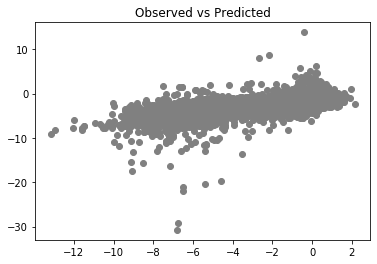

In [22]:
plt.scatter(x=Y, y=y_pred,  color='gray')
plt.title("Observed vs Predicted")
#plt.plot(y2, y_pred, color='red', linewidth=2)
plt.show()

In [23]:
print("Learn metrics")
print('R2:', metrics.r2_score(Y, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, Y, squared=False))
print("NRMSE: %.2f %%" % (metrics.mean_squared_error(y_pred, Y, squared=False)/(Y.values.max()-Y.values.min())*100))

Learn metrics
R2: 0.481912414660154
RMSE: 1.7044719596687925
NRMSE: 11.13 %


Learn metrics
R2: 0.0010085957557179892
RMSE: 2.3668413274874345
NRMSE: 15.46 %


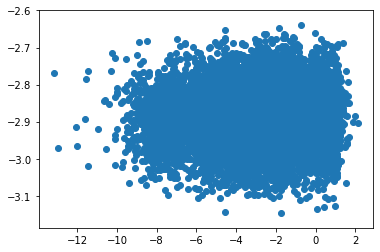

In [28]:
X_rand = pd.DataFrame(np.random.randint(0,100,size=X.shape), columns=X.columns)

reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_rand, Y)
y_pred = reg.predict(X_rand)

print("Learn metrics")
print('R2:', metrics.r2_score(Y, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, Y, squared=False))
print("NRMSE: %.2f %%" % (metrics.mean_squared_error(y_pred, Y, squared=False)/(Y.values.max()-Y.values.min())*100))
plt.scatter(x=Y, y=y_pred)
plt.show()

# Uczenie i testowanie modelu

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.25, random_state=1, shuffle=True)

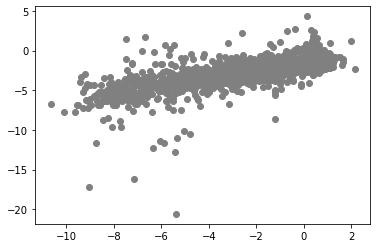

Learn metrics
R2: 0.47843103770850237
RMSE: 1.7057012931737738
NRMSE: 11.310866682750474

Test metrics
R2: 0.49367239334555535
RMSE: 1.7025447715352175
NRMSE: 13.30354061052125


In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=1, shuffle=True)
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = pd.DataFrame(reg.predict(X_test))
y_learn_pred = pd.DataFrame(reg.predict(X_train))

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

print("Learn metrics")
print('R2:', metrics.r2_score(y_train, y_learn_pred))  
print('RMSE:', metrics.mean_squared_error(y_learn_pred, y_train, squared=False))
print('NRMSE:', metrics.mean_squared_error(y_learn_pred, y_train, squared=False)/(y_train.values.max()-y_train.values.min())*100)

print("\nTest metrics")
print('R2:', metrics.r2_score(y_test, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, y_test, squared=False))
print('NRMSE:', metrics.mean_squared_error(y_pred, y_test, squared=False)/(y_test.values.max()-y_test.values.min())*100)

In [32]:
#cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
scores = model_selection.cross_validate(reg, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
print(-scores['test_neg_root_mean_squared_error'].mean())
print(scores['test_r2'].mean())

1.7331676556706896
0.4623734966576312


# Złożoność modelu i regularyzacja

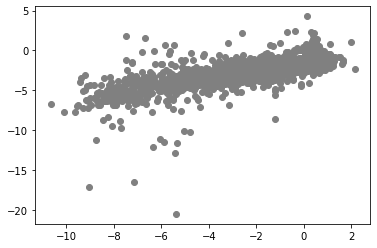

Learn metrics
R2: 0.4776664963856623
RMSE: 1.7069509856128224
NRMSE: 11.319153658101369

Test metrics
R2: 0.4945012186336082
RMSE: 1.7011507234032155
NRMSE: 13.292647636517174


In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=1, shuffle=True)

reg = linear_model.Lasso(alpha=0.02)
reg.fit(X_train, y_train)
y_pred = pd.DataFrame(reg.predict(X_test))
y_learn_pred = pd.DataFrame(reg.predict(X_train))

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

print("Learn metrics")
print('R2:', metrics.r2_score(y_train, y_learn_pred))  
print('RMSE:', metrics.mean_squared_error(y_learn_pred, y_train, squared=False))
print('NRMSE:', metrics.mean_squared_error(y_learn_pred, y_train, squared=False)/(y_train.values.max()-y_train.values.min())*100)

print("\nTest metrics")
print('R2:', metrics.r2_score(y_test, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, y_test, squared=False))
print('NRMSE:', metrics.mean_squared_error(y_pred, y_test, squared=False)/(y_test.values.max()-y_test.values.min())*100)

In [34]:
reg.coef_
results=pd.DataFrame(reg.coef_, index=X.columns)
results

,0
MolWt,-0.004739
MolLogP,-0.446652
MolMR,0.024041
HeavyAtomCount,-0.000000
NumHAcceptors,0.127457
NumHDonors,0.113140
NumHeteroatoms,-0.036733
NumRotatableBonds,-0.013196
NumValenceElectrons,0.017761
NumAromaticRings,-0.015436


In [35]:
cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
for i in np.arange(0.02, 5, 0.2):
    reg = linear_model.Lasso(alpha=i, max_iter=10000)
    scores = model_selection.cross_validate(reg, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("R2:", scores['test_r2'].mean())

Alpha: 0.02
RMSE: 1.7313901038610773
R2: 0.46345821074966176
Alpha: 0.22
RMSE: 1.7520446426775966
R2: 0.4504921084957142
Alpha: 0.42000000000000004
RMSE: 1.767169838153377
R2: 0.44111492707487276
Alpha: 0.6200000000000001
RMSE: 1.7946678095726631
R2: 0.42380103939655867
Alpha: 0.8200000000000001
RMSE: 1.8236726754206607
R2: 0.40520146336019447
Alpha: 1.02
RMSE: 1.8529058142583203
R2: 0.3861199726773949
Alpha: 1.2200000000000002
RMSE: 1.8861360488016843
R2: 0.3639009675349875
Alpha: 1.4200000000000002
RMSE: 1.908047758237565
R2: 0.34904718681511493
Alpha: 1.62
RMSE: 1.9083715372834196
R2: 0.3488389113116145
Alpha: 1.82
RMSE: 1.9087468654752158
R2: 0.3485942756325393
Alpha: 2.02
RMSE: 1.9091543020480113
R2: 0.34832719577773885
Alpha: 2.22
RMSE: 1.9096026072026426
R2: 0.34803126611835145
Alpha: 2.4200000000000004
RMSE: 1.9099733526336262
R2: 0.3477907655178109
Alpha: 2.62
RMSE: 1.910204275052261
R2: 0.3476500182959688
Alpha: 2.8200000000000003
RMSE: 1.9104698048867532
R2: 0.34748528872778

In [36]:
#Kolejny przykład regularyzacji
reg = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#plt.scatter(y_test, y_pred,  color='gray')
#plt.plot(y2, y_pred, color='red', linewidth=2)
#plt.show()
print('Determination coefficient:', metrics.r2_score(y_test, y_pred))  
print('Root Mean Squared Error:', metrics.mean_squared_error(y_pred, y_test, squared=False))
print('Normalized Root Mean Squared Error [%]:', metrics.mean_squared_error(y_pred, y_test, squared=False)/(y_test.values.max()-y_test.values.min())*100)

Determination coefficient: 0.47036525336065094
Root Mean Squared Error: 1.7412894642531769
Normalized Root Mean Squared Error [%]: 13.606288357090495


# Wielomiany

In [37]:
X_poly=preprocessing.PolynomialFeatures(interaction_only=False).fit_transform(X)

In [38]:
X_poly.shape

(9982, 153)

In [39]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X_poly, Y, test_size=0.20, random_state=42, shuffle=True)

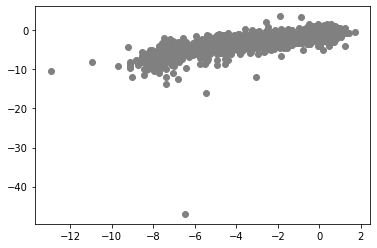

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.549419323423525

Test metrics
R2: 0.5126479285285654
RMSE: 1.625949605871507
NRMSE: 11.097938285630283


In [40]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = pd.DataFrame(reg.predict(X_test))
y_learn_pred = pd.DataFrame(reg.predict(X_train))

plt.scatter(y_test, y_pred,  color='gray')
#plt.plot(y2, y_pred, color='red', linewidth=2)
plt.show()

print("Learn metrics")
print('R2:', metrics.r2_score(y_train, y_learn_pred))  
print('RMSE:', metrics.mean_squared_error(y_learn_pred, y_train, squared=False))
print('NRMSE:', metrics.mean_squared_error(y_learn_pred, y_train, squared=False)/(y_train.values.max()-y_train.values.min())*100)

print("\nTest metrics")
print('R2:', metrics.r2_score(y_test, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, y_test, squared=False))
print('NRMSE:', metrics.mean_squared_error(y_pred, y_test, squared=False)/(y_test.values.max()-y_test.values.min())*100)

In [41]:
cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
for i in np.arange(0.05, 1, 0.05):
    reg = linear_model.Lasso(alpha=i, max_iter=1000, tol=0.5)
    scores = model_selection.cross_validate(reg, X=X_poly, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("R2:", scores['test_r2'].mean())

Alpha: 0.05
RMSE: 1.543502950678381
R2: 0.5678486073237238
Alpha: 0.1
RMSE: 1.5263481746418355
R2: 0.5799810104333368
Alpha: 0.15000000000000002
RMSE: 1.5186046037763516
R2: 0.5852576114431846
Alpha: 0.2
RMSE: 1.5211003566683448
R2: 0.5839106215768763
Alpha: 0.25
RMSE: 1.52137548994062
R2: 0.5839673785525352
Alpha: 0.3
RMSE: 1.5220591422765755
R2: 0.5837507458444858
Alpha: 0.35000000000000003
RMSE: 1.523690002361376
R2: 0.5829974328736729
Alpha: 0.4
RMSE: 1.5258084847510143
R2: 0.581963091827321
Alpha: 0.45
RMSE: 1.52826272881539
R2: 0.5807460518357678
Alpha: 0.5
RMSE: 1.530837641858183
R2: 0.5794529517292253
Alpha: 0.55
RMSE: 1.53372990713661
R2: 0.5779628082355501
Alpha: 0.6000000000000001
RMSE: 1.537269554504516
R2: 0.5760965625810679
Alpha: 0.6500000000000001
RMSE: 1.5416087691812914
R2: 0.5737684126146021
Alpha: 0.7000000000000001
RMSE: 1.5466169669932088
R2: 0.5710513918006492
Alpha: 0.7500000000000001
RMSE: 1.552373424757956
R2: 0.5678990364213489
Alpha: 0.8
RMSE: 1.557559720259

In [42]:
reg = linear_model.Lasso(alpha=0.15, tol=0.2)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = pd.DataFrame(reg.predict(X_train))

print("LEARN")
print('R2:', metrics.r2_score(y_train, y_pred_train))  
print('RMSE:', metrics.mean_squared_error(y_pred_train, y_train, squared=False))
print('NRMSE [%]:', metrics.mean_squared_error(y_pred_train, y_train, squared=False)/(y_pred_train.values.max()-y_pred_train.values.min())*100)

print("TEST")
print('R2:', metrics.r2_score(y_test, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, y_test, squared=False))
print('NRMSE [%]:', metrics.mean_squared_error(y_pred, y_test, squared=False)/(y_test.values.max()-y_test.values.min())*100)


LEARN
R2: 0.6356836220577402
RMSE: 1.4351117702408296
NRMSE [%]: 7.638712990672139
TEST
R2: 0.617010843137414
RMSE: 1.4413813954933803
NRMSE [%]: 9.83816578046228


# Sieci Neuronowe - MLP

In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=42, shuffle=True)

In [44]:
scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train)
y_train_scaled=scalerY.transform(y_train)
y_test_scaled=scalerY.transform(y_test)

In [45]:
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='lbfgs',
                            max_iter=500)

mlp.fit(X_train_scaled, y_train_scaled)

y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

print("LEARN")
print('Determination coefficient:', metrics.r2_score(y_train, y_pred_train))  
print('Root Mean Squared Error:', metrics.mean_squared_error(y_pred_train, y_train, squared=False))
print('Normalized Root Mean Squared Error [%]:', metrics.mean_squared_error(y_pred_train, y_train, squared=False)/(y_pred_train.max()-y_pred_train.min())*100)

print("TEST")
print('Determination coefficient:', metrics.r2_score(y_test, y_pred))  
print('Root Mean Squared Error:', metrics.mean_squared_error(y_pred, y_test, squared=False))
print('Normalized Root Mean Squared Error [%]:', metrics.mean_squared_error(y_pred, y_test, squared=False)/(y_test.max()-y_test.min())*100)

/home/student/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LEARN
Determination coefficient: 0.7265235937080248
Root Mean Squared Error: 1.2433869667431083
Normalized Root Mean Squared Error [%]: 9.690909863086228
TEST
Determination coefficient: 0.7226605342512601
Root Mean Squared Error: 1.2265676612414944
Normalized Root Mean Squared Error [%]: 0    8.371952
dtype: float64


/home/student/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [51]:
cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
architecture=[(5,5,5), (10,10,10)]
for i in architecture:

    mlp=neural_network.MLPRegressor(hidden_layer_sizes=i, activation='relu', solver='lbfgs',
                                max_iter=500)

    scores = model_selection.cross_validate(mlp, X=X_train_scaled, y=y_train_scaled.ravel(), cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Architecture:" , architecture)
    print("RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("R2:", scores['test_r2'].mean())



/home/student/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Architecture: [(5, 5, 5), (10, 10, 10)]
RMSE: 0.11454579344073326
R2: 0.41236117339294937


/home/student/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/student/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/student/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: C

Architecture: [(5, 5, 5), (10, 10, 10)]
RMSE: 0.08576528047521284
R2: 0.6927658701781382


In [52]:
##Sprawdzamy jak najlepszy model/architektura sprawdza się podczas testowania.
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='lbfgs',
                            max_iter=500)

mlp.fit(X_train_scaled, y_train_scaled.ravel())

y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

print("LEARN")
print('Determination coefficient:', metrics.r2_score(y_train, y_pred_train))  
print('Root Mean Squared Error:', metrics.mean_squared_error(y_pred_train, y_train, squared=False))
print('Normalized Root Mean Squared Error [%]:', metrics.mean_squared_error(y_pred_train, y_train, squared=False)/(y_pred_train.max()-y_pred_train.min())*100)

print("TEST")
print('Determination coefficient:', metrics.r2_score(y_test, y_pred))  
print('Root Mean Squared Error:', metrics.mean_squared_error(y_pred, y_test, squared=False))
print('Normalized Root Mean Squared Error [%]:', metrics.mean_squared_error(y_pred, y_test, squared=False)/(y_test.max()-y_test.min())*100)

/home/student/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LEARN
Determination coefficient: 0.7237668469257938
Root Mean Squared Error: 1.2496381607530462
Normalized Root Mean Squared Error [%]: 10.74251368542869
TEST
Determination coefficient: 0.7202882390398391
Root Mean Squared Error: 1.2318023736204984
Normalized Root Mean Squared Error [%]: 0    8.407682
dtype: float64


In [53]:
Y.max()-Y.min()

0    15.309582
dtype: float64

In [54]:
0.08576528047521284*15.309582

1.31303059418827